<a href="https://colab.research.google.com/github/kaaBima/skripsi_biodiversitas/blob/master/Bab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Impor pustaka yang akan digunakan dalam penelitian


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import librosa
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Input, layers
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold


%matplotlib inline
plt.style.use('ggplot')

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
root_path = 'gdrive/My Drive/Colab Notebooks/SKRIPSI/'  #change dir to your project folder

In [0]:
dataset = pd.read_csv(root_path + 'sudah_jadi.csv').drop(['Unnamed: 0'], axis=1)
dataset.head()

,fname,label
0,cekakak_sungai_(1).wav,cekakak_sungai
1,cekakak_sungai_(2).wav,cekakak_sungai
2,cekakak_sungai_(3).wav,cekakak_sungai
3,cekakak_sungai_(4).wav,cekakak_sungai
4,cekakak_sungai_(5).wav,cekakak_sungai


In [0]:
LABELS = list(dataset.label.unique())

In [0]:
label_idx = {label: i for i, label in enumerate(LABELS)}

In [0]:
y = to_categorical(dataset.label.apply(lambda x: label_idx[x]))

In [0]:
data_audio, sr = librosa.load(root_path + "/audio_train/" + dataset.fname[0])
print(data_audio)
print(len(data_audio))

[-1.17820484e-04 -8.27441690e-05 -8.39589120e-06 ...  9.42908155e-05
  1.54399226e-04 -4.59795236e-04]
18369


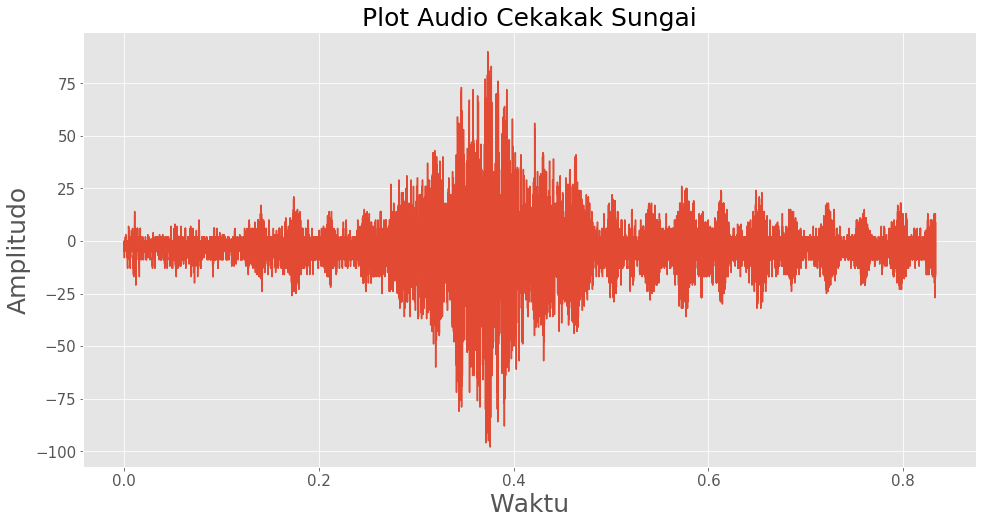

In [0]:
from scipy.io import wavfile

sr, data_audio = wavfile.read(root_path + '/audio_train/cekakak_sungai_(1).wav')

plt.figure(figsize=(16,8))
plt.title('Plot Audio Cekakak Sungai', fontsize=25)
plt.ylabel('Amplitudo', fontsize=25)
plt.xlabel('Waktu', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(np.linspace(0, len(data_audio)/sr, len(data_audio)), data_audio, '-')
plt.savefig(root_path + 'plot_audio_cekakak_1.jpg', dpi=300, quality=100)

In [0]:
import wave

dataset_frames = dataset
dataset_frames['frames'] = dataset.fname.apply(lambda f: wave.open(root_path + "audio_train/" + f).getnframes())

train, test, ytrain, ytest = train_test_split(dataset_frames, dataset_frames.label, test_size=0.3, random_state=101)

Text(0.5, 0.98, 'Distribusi panjang pada training dan test set')

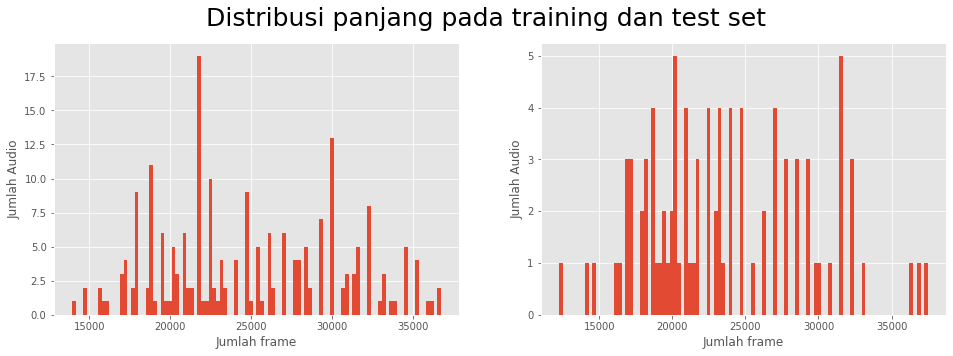

In [0]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
train.frames.hist(bins=100, ax=axes[0])
test.frames.hist(bins=100, ax=axes[1])

plt.setp(axes, xlabel='Jumlah frame', ylabel='Jumlah Audio')
plt.suptitle('Distribusi panjang pada training dan test set', ha='center', fontsize=25)

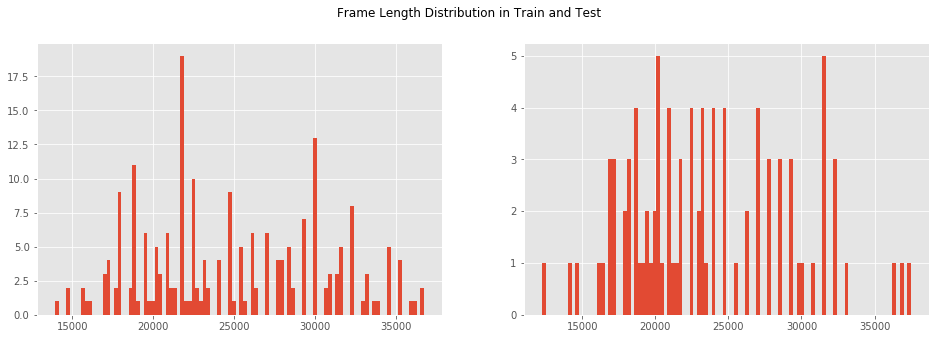

In [0]:

train, test, ytrain, ytest = train_test_split(dataset_frames, dataset_frames.label, test_size=0.3, random_state=101)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
train.frames.hist(bins=100, ax=axes[0])
test.frames.hist(bins=100, ax=axes[1])
plt.suptitle('Frame Length Distribution in Train and Test', ha='center', fontsize='large');

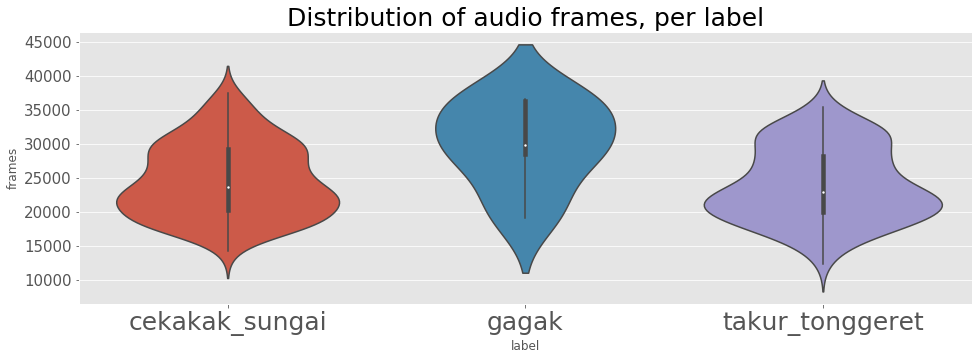

In [0]:
import seaborn as sns
_, ax = plt.subplots(figsize=(16, 5))
sns.violinplot(ax=ax, x="label", y="frames", data=dataset_frames)
# plt.xticks(rotation=90)
plt.title('Distribution of audio frames, per label', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=15)
plt.savefig('distribusi-audio-frame.jpg', dpi=300, quality=100)
plt.show()

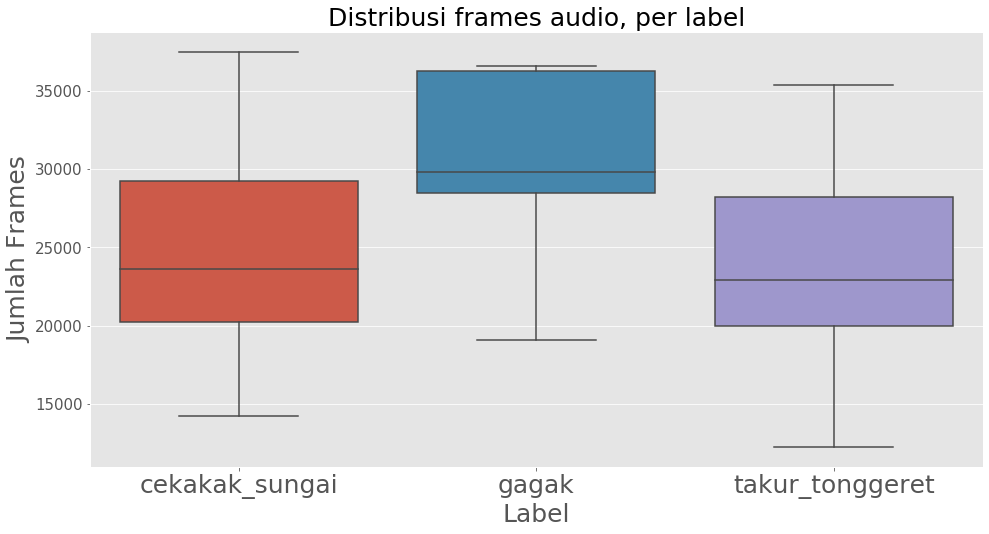

In [0]:
_, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(ax=ax, x='label', y='frames', data=dataset_frames)
# plt.xticks(rotation=90)
plt.title('Distribusi frames audio, per label', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=15)
plt.xlabel('Label', fontsize=25)
plt.ylabel('Jumlah Frames', fontsize=25)
plt.savefig(root_path + 'distribusi-audio-frame.jpg', dpi=300, quality=100)
plt.show()

In [0]:
audio_wavform = list()
for fname in dataset.fname:
    file_path = root_path + '/audio_train/' + fname

    # Read and Resample the audio
    data, sr = librosa.core.load(file_path)
    data = librosa.resample(data, sr, 16000)
    data = librosa.util.fix_length(data, 16000, mode='constant')
    audio_wavform.append(data)

In [0]:
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler

In [0]:
df = pd.DataFrame(audio_wavform)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,15960,15961,15962,15963,15964,15965,15966,15967,15968,15969,15970,15971,15972,15973,15974,15975,15976,15977,15978,15979,15980,15981,15982,15983,15984,15985,15986,15987,15988,15989,15990,15991,15992,15993,15994,15995,15996,15997,15998,15999
0,-0.000100,-5.805046e-05,-0.000052,-9.511874e-05,-0.000120,-0.000133,-0.000108,-0.000149,-0.000162,-0.000118,-0.000123,-0.000123,-0.000120,-0.000125,-1.175062e-04,-0.000131,-0.000046,0.000009,-0.000005,0.000003,-0.000002,9.860794e-07,2.010348e-07,-0.000002,0.000040,0.000007,-0.000002,5.703911e-07,0.000001,0.000046,1.991979e-05,0.000017,0.000004,0.000005,-0.000004,-0.000003,0.000007,-0.000010,0.000016,-0.000097,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000002,-1.652519e-06,0.000001,-4.958999e-07,-0.000001,0.000005,-0.000069,-0.000135,-0.000114,-0.000127,-0.000126,-0.000025,0.000008,-0.000004,-1.213969e-07,0.000007,-0.000084,-0.000103,-0.000027,0.000003,-0.000039,-1.306040e-04,-1.862763e-04,-0.000159,-0.000105,-0.000041,-0.000021,-1.465013e-04,-0.000042,-0.000007,-1.260749e-04,-0.000123,-0.000129,-0.000029,0.000008,-0.000004,0.000001,0.000004,-0.000063,-0.000146,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000010,-4.876720e-05,-0.000181,2.886577e-05,-0.000343,-0.000124,-0.000115,-0.000172,0.000124,-0.000245,0.000040,-0.000119,-0.000168,-0.000059,-2.664741e-04,-0.000129,-0.000126,-0.000137,-0.000307,-0.000011,-0.000193,-1.277514e-04,-1.709384e-05,-0.000381,0.000022,-0.000252,-0.000175,-2.030492e-05,-0.000124,0.000029,-1.357964e-04,-0.000056,-0.000176,-0.000112,0.000030,-0.000150,0.000065,0.000074,-0.000030,0.000034,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.000006,3.386651e-07,-0.000076,-1.260463e-04,-0.000022,0.000011,-0.000038,-0.000138,-0.000101,0.000008,-0.000009,0.000012,-0.000038,-0.000123,-1.237200e-04,-0.000119,-0.000126,-0.000128,-0.000036,0.000022,-0.000084,-1.284325e-04,-1.250413e-04,-0.000062,0.000022,-0.000077,-0.000122,-1.343641e-04,-0.000062,0.000010,-3.125818e-07,-0.000061,-0.000141,-0.000089,0.000005,-0.000088,-0.000137,-0.000112,-0.000127,0.000001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000054,-2.039615e-05,-0.000166,-6.318187e-05,-0.000185,-0.000133,-0.000157,-0.000289,-0.000263,-0.000245,-0.000211,-0.000264,-0.000205,-0.000125,-2.428157e-04,-0.000209,-0.000123,-0.000112,-0.000177,-0.000252,-0.000253,-1.707581e-04,-1.942415e-04,-0.000116,0.000013,-0.000090,-0.000142,-1.047107e-04,-0.000083,-0.000139,5.417105e-05,-0.000005,0.000016,0.000144,-0.000022,0.000036,0.000006,0.000003,0.000059,-0.000019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
scaler = StandardScaler()
# scaler = MinMaxScaler()
scaled_dataset = scaler.fit_transform(df)

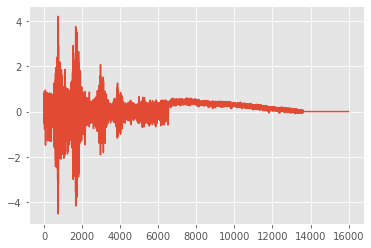

In [0]:
plt.plot(scaled_dataset[1], '-')

In [0]:
df_norm = df.iloc[1, :]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(scaled_dataset, y, test_size = 0.3, random_state=101)

In [0]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
X_train.shape
y_train.shape

(214, 3)

In [0]:
lr = 0.001
drop_out_rate = 0.5
nb_classes = 3

In [0]:
#ARSITEKTUR 1
# np.random.seed(73)
arsi=1
input_shape = (X_train.shape[1], 1)
input_tensor = Input(shape=(input_shape))

x = layers.Conv1D(256, 8, activation='relu', padding='same', strides=4)(input_tensor)
# x = layers.BatchNormalization(axis=1, momentum=0.99, epsilon=0.001)(x)
x = layers.MaxPooling1D(4)(x)
x = layers.Conv1D(256, 3, activation='relu', padding='same', strides=1)(x)
x = layers.MaxPooling1D(4)(x)
# x = layers.BatchNormalization(axis=1, momentum=0.99, epsilon=0.001)(x)
x = layers.GlobalMaxPooling1D()(x)


output_tensor = layers.Dense(3, activation='softmax')(x)

model = None

model = tf.keras.Model(input_tensor, output_tensor)
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(lr = lr),
             metrics=['acc'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
#ARSITEKTUR 2
arsi=2
input_shape = (X_train.shape[1], 1)
input_tensor = Input(shape=(input_shape))

x = layers.Conv1D(256, 8, activation='relu', padding='same', strides=4)(input_tensor)
# x = layers.BatchNormalization(axis=1, momentum=0.99, epsilon=0.001)(x)
x = layers.MaxPooling1D(4)(x)
x = layers.Conv1D(256, 3, activation='relu', padding='same', strides=1)(x)
# x = layers.BatchNormalization(axis=1, momentum=0.99, epsilon=0.001)(x)
x = layers.MaxPooling1D(4)(x)
x = layers.Conv1D(512, 3, activation='relu', padding='same', strides=1)(x)
x = layers.MaxPool1D(4)(x)
# x = layers.BatchNormalization(axis=1, momentum=0.99, epsilon=0.001)(x)
x = layers.GlobalMaxPooling1D()(x)


output_tensor = layers.Dense(3, activation='softmax')(x)

model = None

model = tf.keras.Model(input_tensor, output_tensor)

model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(lr = lr),
             metrics=['acc'])

In [0]:
#ARSITEKTUR 3
arsi=3
input_shape = (X_train.shape[1], 1)
input_tensor = Input(shape=(input_shape))
x = layers.Conv1D(256, 8, activation='relu', padding='same', strides=4)(input_tensor)
# x = layers.BatchNormalization(axis=1, momentum=0.99, epsilon=0.001)(x)
x = layers.MaxPooling1D(4)(x)
x = layers.Conv1D(256, 3, activation='relu', padding='same', strides=1)(x)
# x = layers.BatchNormalization(axis=1, momentum=0.99, epsilon=0.001)(x)
x = layers.MaxPooling1D(4)(x)
x = layers.Conv1D(512, 3, activation='relu', padding='same', strides=1)(x)
x = layers.MaxPool1D(4)(x)
# x = layers.BatchNormalization(axis=1, momentum=0.99, epsilon=0.001)(x)
# x = layers.BatchNormalization(axis=1, momentum=0.99, epsilon=0.001)(x)
# x = layers.ELU()(x)
x = layers.GlobalMaxPooling1D()(x)


x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
# x = layers.BatchNormalization(axis=1, momentum=0.99, epsilon=0.001)(x)

#kernel_regularizer=regularizers.l2(0.01)
x = layers.Dense(64, activation='relu')(x)
# x = layers.BatchNormalization(axis=1, momentum=0.99, epsilon=0.001)(x)
# x = layers.ELU()(x)
# x = layers.Dropout(drop_out_rate)(x)
output_tensor = layers.Dense(3, activation='softmax')(x)

model = None
model = tf.keras.Model(input_tensor, output_tensor)

sgd = optimizers.SGD(lr=lr, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(lr=lr),
             metrics=['acc'])

In [0]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 16000, 1)]        0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 4000, 256)         2304      
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 1000, 256)         0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 1000, 256)         196864    
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 250, 256)          0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 250, 512)          393728    
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 62, 512)           0   

In [0]:
# kfold = KFold(n_splits=10, shuffle=True)

# for train, val in enumerate(kfold.split(X_train, y_train)):
  
#   X_train = X_train.iloc[train]
#   X_val = X_train.iloc[val]
#   X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
#   X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
# cb = EarlyStopping(monitor='val_loss', mode='min', patience=50)

history = model.fit(X_train, y_train, validation_split=0.1, epochs=500, batch_size=32, verbose=2)

Train on 192 samples, validate on 22 samples
Epoch 1/500
192/192 - 1s - loss: 0.9506 - acc: 0.5521 - val_loss: 0.8399 - val_acc: 0.3182
Epoch 2/500
192/192 - 0s - loss: 0.8456 - acc: 0.4635 - val_loss: 0.8086 - val_acc: 0.3182
Epoch 3/500
192/192 - 0s - loss: 0.8212 - acc: 0.4896 - val_loss: 0.7862 - val_acc: 0.3182
Epoch 4/500
192/192 - 0s - loss: 0.7585 - acc: 0.6458 - val_loss: 0.7499 - val_acc: 0.3182
Epoch 5/500
192/192 - 0s - loss: 0.7377 - acc: 0.5521 - val_loss: 0.7022 - val_acc: 0.7273
Epoch 6/500
192/192 - 0s - loss: 0.7300 - acc: 0.5833 - val_loss: 0.7572 - val_acc: 0.3636
Epoch 7/500
192/192 - 0s - loss: 0.6859 - acc: 0.6406 - val_loss: 0.6928 - val_acc: 0.7727
Epoch 8/500
192/192 - 0s - loss: 0.6753 - acc: 0.6094 - val_loss: 0.6749 - val_acc: 0.8182
Epoch 9/500
192/192 - 0s - loss: 0.6456 - acc: 0.6875 - val_loss: 0.7402 - val_acc: 0.5000
Epoch 10/500
192/192 - 0s - loss: 0.5955 - acc: 0.6927 - val_loss: 0.6722 - val_acc: 0.7273
Epoch 11/500
192/192 - 0s - loss: 0.5984 - a

In [0]:
# parameter nama
loss = 'loss'
acc = 'accuracy'
arsitektur = 'arsitektur-{1}, variasi-1, Standarisasi, lr={0}'.format(lr, arsi) # harap diganti
arsitektur_path = 'berubah-8636-arsitektur-{1}_variasi-1_Standarisasi_lr={0}'.format(lr, arsi) # harap diganti
arsitektur

'arsitektur-3, variasi-1, Standarisasi, lr=0.001'

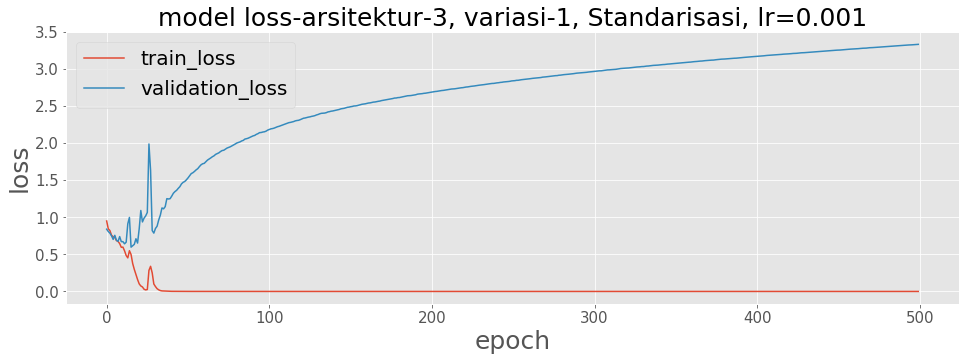

In [0]:
plt.figure(figsize=(16,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model ' + loss + '-' + arsitektur, fontsize=25)
plt.ylabel(loss, fontsize=25)
plt.xlabel('epoch', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(['train_loss', 'validation_loss'], loc='upper left', fontsize=20)
# plt.savefig(root_path + loss + '-' + arsitektur_path + '.jpg', dpi=300, quality=100)
plt.show()

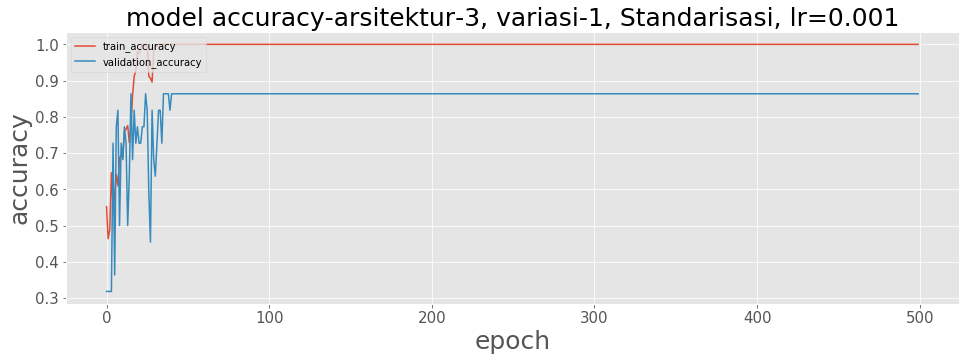

In [0]:
plt.figure(figsize=(16,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model ' + acc + '-' + arsitektur, fontsize=25)
plt.ylabel(acc, fontsize=25)
plt.xlabel('epoch', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(['train_accuracy', 'validation_accuracy'], loc='upper left', fontsize=10)
# plt.savefig(root_path + acc + '-' + arsitektur_path + '.jpg', dpi=300, quality=100)
plt.show()

In [0]:
# jangan lupa dikomen setiap running
# lr1 = history
# lr2 = history
lr3 = history

# do1 = history
# do2 = history
# do3 = history

# l2_1 = history
# l2_2 = history
# l2_3 = history

# bn1 = history
# bn2 = history

In [0]:
bx1 = [lr1.history['val_acc'], lr2.history['val_acc'], lr3.history['val_acc']]
bx1 = np.array(bx1).reshape((-1,3))
bx = pd.DataFrame(bx1, columns=['LR1', 'LR2', 'LR3'])
bx.head()

,LR1,LR2,LR3
0,0.681818,0.681818,0.318182
1,0.318182,0.590909,0.318182
2,0.681818,0.636364,0.318182
3,0.318182,0.454545,0.500000
4,0.409091,0.363636,0.409091


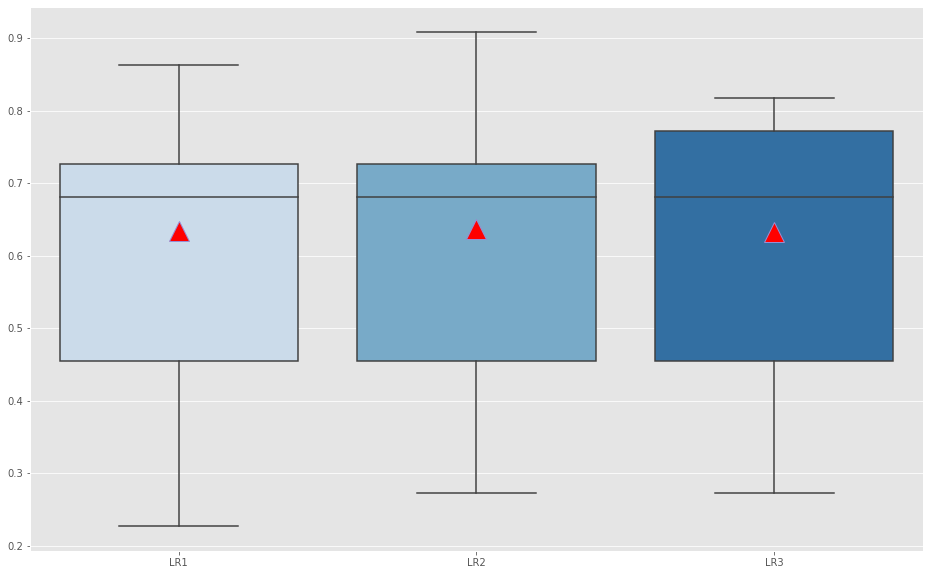

In [0]:
plt.figure(figsize=(16,10))
bx_plot = sns.boxplot(data=bx, showmeans=True, palette="Blues", meanprops={'markersize':20, 'markerfacecolor':'red'})

In [0]:
result = model.evaluate(X_test, y_test, batch_size=32)

92/92 [==============================] - 0s 1ms/sample - loss: 4.3477 - acc: 0.7391


In [0]:
model.save(root_path + 'model8636.h5')

In [0]:
from tensorflow.keras.models import load_model
model = load_model(root_path + 'model8636.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
y_label = []
for x in range(len(y_test)):
  if y_test[x][0] == 1.:
    y_label += [0]
  elif y_test[x][1] == 1.:
    y_label += [1]
  else:
    y_label += [2]

In [0]:
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_label, y_pred)
cm

array([[26,  0, 13],
       [ 1,  1,  1],
       [ 9,  0, 41]])

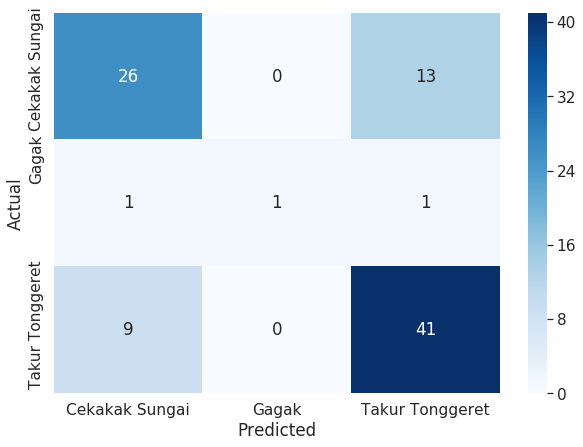

In [0]:
df_cm = pd.DataFrame(cm, columns=['Cekakak Sungai', 'Gagak', 'Takur Tonggeret'], index = ['Cekakak Sungai', 'Gagak', 'Takur Tonggeret'])
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True)# font size
plt.ylim(3,0)
# plt.xticks(np.arange(0.5,3.5), ('Cekakak Sungai', 'Gagak', 'Takur Tonggeret'))
plt.yticks(np.arange(0,4), ['Cekakak Sungai', 'Gagak', 'Takur Tonggeret'])
plt.savefig(root_path + 'cm_8636.jpg', dpi=300, quality=100)

In [0]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=['Cekakak Sungai', 'Gagak', 'Takur Tonggeret'], yticklabels=['Cekakak Sungai', 'Gagak', 'Takur Tonggeret'],
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[26  0 13]
 [ 1  1  1]
 [ 9  0 41]]


<Figure size 1152x1008 with 0 Axes>

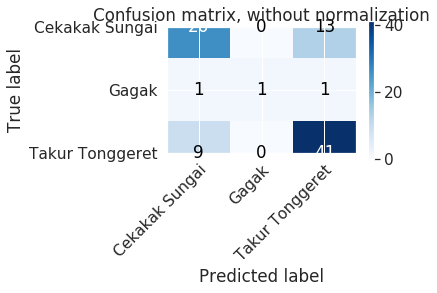

In [0]:
from sklearn.utils.multiclass import unique_labels
plt.figure(figsize=(16,14))
plot_confusion_matrix(y_label, y_pred, classes=y_test)

In [0]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.ylim(3,0)

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

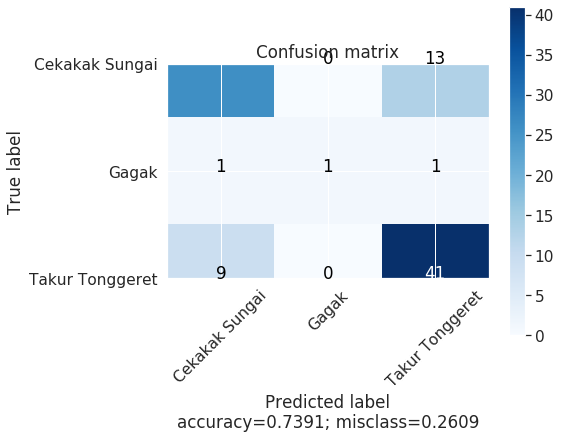

In [0]:
plot_confusion_matrix(cm, ['Cekakak Sungai', 'Gagak', 'Takur Tonggeret'], normalize=False)

In [0]:
history2 = model.fit(X_train, y_train, validation_split=0.1, epochs=500, batch_size=32, verbose=2)

Train on 192 samples, validate on 22 samples
Epoch 1/500
192/192 - 1s - loss: 0.9676 - acc: 0.4427 - val_loss: 0.8421 - val_acc: 0.3182
Epoch 2/500
192/192 - 0s - loss: 0.8341 - acc: 0.4323 - val_loss: 0.7617 - val_acc: 0.7273
Epoch 3/500
192/192 - 0s - loss: 0.7762 - acc: 0.5312 - val_loss: 0.7784 - val_acc: 0.2727
Epoch 4/500
192/192 - 0s - loss: 0.7410 - acc: 0.5938 - val_loss: 0.7797 - val_acc: 0.2727
Epoch 5/500
192/192 - 0s - loss: 0.6989 - acc: 0.5885 - val_loss: 0.7174 - val_acc: 0.7273
Epoch 6/500
192/192 - 0s - loss: 0.6755 - acc: 0.6146 - val_loss: 0.7230 - val_acc: 0.7727
Epoch 7/500
192/192 - 0s - loss: 0.6389 - acc: 0.6458 - val_loss: 0.6937 - val_acc: 0.7273
Epoch 8/500
192/192 - 0s - loss: 0.6494 - acc: 0.6562 - val_loss: 0.6863 - val_acc: 0.7273
Epoch 9/500
192/192 - 0s - loss: 0.6367 - acc: 0.6979 - val_loss: 0.7198 - val_acc: 0.5909
Epoch 10/500
192/192 - 0s - loss: 0.5585 - acc: 0.7240 - val_loss: 0.6378 - val_acc: 0.7727
Epoch 11/500
192/192 - 0s - loss: 0.5147 - a

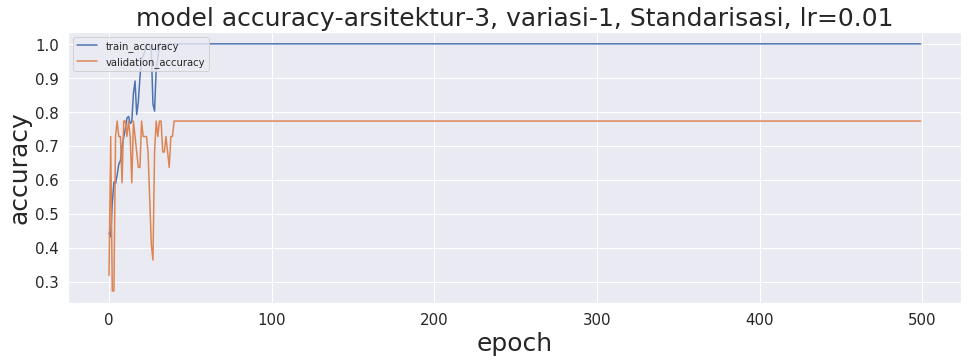

In [0]:
plt.figure(figsize=(16,5))
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model ' + acc + '-' + arsitektur, fontsize=25)
plt.ylabel(acc, fontsize=25)
plt.xlabel('epoch', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(['train_accuracy', 'validation_accuracy'], loc='upper left', fontsize=10)
# plt.savefig(root_path + acc + '-' + arsitektur_path + '.jpg', dpi=300, quality=100)
plt.show()

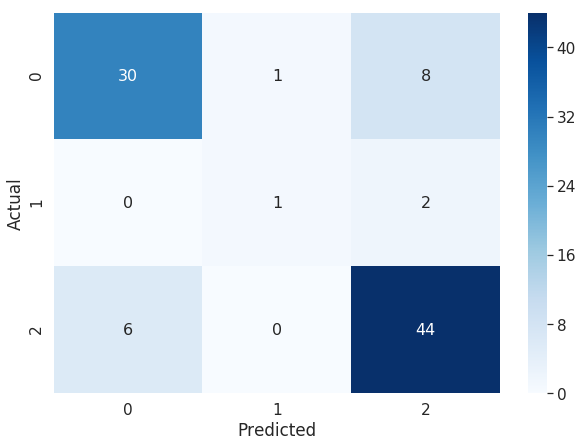

In [0]:
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_label, y_pred)
cm


df_cm = pd.DataFrame(cm, columns=np.unique(y_label), index = np.unique(y_label))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size
plt.savefig(root_path + 'cm_7727.jpg', dpi=300, quality=100)

In [0]:
y_label